### I have a hypothesis that there is an easter egg hidden in the XKCD random page feature. I've downloaded approximately 50000 random redirects and I'll try to do some statistical analysis on it.

xkcd-random.txt was generated with the following shell script:

```bash
for i in $(seq 1 50000); do
    curl -s -D - https://c.xkcd.com/random/comic/ | grep location >> xkcd-random.txt
done
```

In [1]:
import re

numbers = []
with open('xkcd-random.txt', 'r') as f:
    for l in f:
        numbers.append(int(re.compile(r'/(\d+)/$').search(l)[1]))

len(numbers)

50000

In [2]:
import numpy as np
bins = np.bincount(numbers)

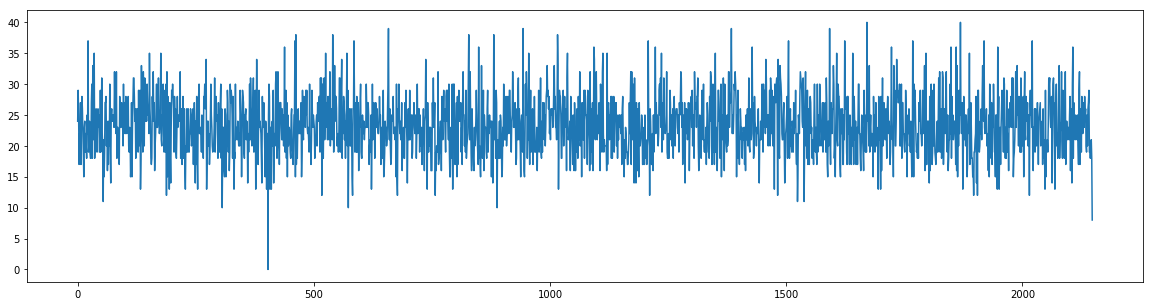

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(20,5))
plt.plot(range(len(bins)-1), bins[1:])

Apparently there is a zero in the generated numbers, let's see where it is.

In [4]:

np.nonzero(bins == 0)

(array([  0, 404]),)

The 404 April's fool joke comic:

https://www.explainxkcd.com/wiki/index.php/404:_Not_Found

The last comic also has relatively few entries. This is because it was published while the script was running, so it 
is underrepresented in the sample. We'll remove it from the analysis.

In [5]:
mu, sigma = np.mean(bins), np.std(bins)
zlast = (bins[-1] - mu) / sigma

mu, sigma, zlast

(23.25581395348837, 4.923097074260877, -3.098824525165144)

In [6]:
bins = bins[bins != 0][:-1]

Let's try to reject the null hypothesis that the XKCD random generator uses a uniform distribution using a chi-squared test.

In [12]:
from scipy.stats import chisquare

stat, pvalue = chisquare(bins)
stat, pvalue

(2181.405584893583, 0.29196557341698826)

We are not able to reject the null hypothesis, p-value=0.29

Let's try the Kolmogorov-Smirnov test against a uniform random sample of the same size. Properly, it should be used only for continuous distributions, whereas we have a discrete distribution. However, since the support of our distribution has more than 2000 elements, I think it approximates a continuous distribution well enough. Correct me if I'm wrong.

In [11]:
from scipy.stats import ks_2samp

np.random.seed(0x020d69ec2ee5b3f192483936e2c7f561 % 2**32)
U = np.random.randint(0, len(bins), len(numbers))

stat, pvalue = ks_2samp(U, numbers)
stat, pvalue

(0.005120000000000013, 0.5277023637762152)

We are not able to reject the null hypothesis, p-value=0.53

In conclusion, the XKCD's random page feature doesn't appear to have a hidden easter egg in it. The distribution of the returned pages appears to be uniform, with the exception of page 404 that never gets returned.